In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


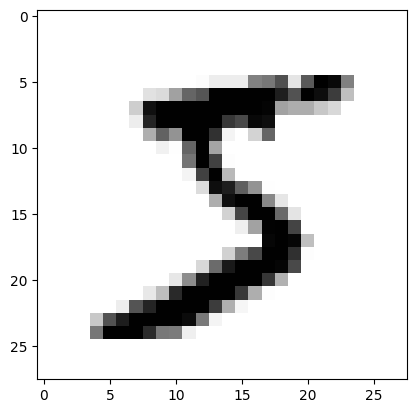

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_mean = np.mean(x_test_reshaped)
x_std = np.std(x_test_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import pytz
from datetime import datetime
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# DNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from datetime import datetime
model = Sequential([
    Dense(128, activation = 'relu', input_shape=(784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size= 64)

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Accuracy: ', accuracy*100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7419 - loss: 0.8726
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9254 - loss: 0.2528
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.2018
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9512 - loss: 0.1699
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9593 - loss: 0.1372
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1285
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1167
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9728 - loss: 0.0994
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9723 - loss: 0.0959
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0871
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1162
Accuracy:  96.8999981880188


# ConvNet

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize the data
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# One-hot encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the ConvNet model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size= 64)

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Accuracy: ', accuracy*100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5594 - loss: 1.4595
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9267 - loss: 0.2458
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9536 - loss: 0.1558
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9625 - loss: 0.1223
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9716 - loss: 0.0969
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9733 - loss: 0.0868
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9766 - loss: 0.0752
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9791 - loss: 0.0679
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9804 - loss: 0.0653
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0583
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0650
Accuracy:  98.33999872207642


# VGG

In [ ]:
#Define the VGG-like model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

model.fit(x_train_norm, y_train_encoded, epochs=10, batch_size= 64)

loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Accuracy: ', accuracy*100)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,440,586 (5.50 MB)

 Trainable params: 1,440,586 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4257 - loss: 1.8422
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9566 - loss: 0.1341
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9751 - loss: 0.0809
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9826 - loss: 0.0573
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9850 - loss: 0.0458
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9875 - loss: 0.0375
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9896 - loss: 0.0321
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9914 - loss: 0.0280
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9927 - loss: 0.0237
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9946 - loss: 0.0183
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9859 - loss: 0.0465
Accuracy:  98.82000088691711


# DNN 0.1

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the model
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model1.add(Dense(64, activation='relu'))     # First hidden layer
model1.add(Dense(128, activation='relu'))    # Second hidden layer
model1.add(Dense(10, activation='softmax'))   # Output layer

# Compile the model with a learning rate of 0.1
model1.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model1.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("DNN with learning rate 0.1")

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_dnn1 = model1.fit(X_train, y_train, epochs=10, batch_size= 64, validation_split= 0.2)

y_prod = model1.predict(X_test)
y_pred = y_prod.argmax(axis=1)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:07:32
DNN with learning rate 0.1
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3283 - loss: 2.7493 - val_accuracy: 0.3808 - val_loss: 1.5372
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3661 - loss: 1.5908 - val_accuracy: 0.3762 - val_loss: 1.5165
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3181 - loss: 1.6851 - val_accuracy: 0.2619 - val_loss: 1.9255
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2772 - loss: 1.8050 - val_accuracy: 0.2687 - val_loss: 1.8931
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2758 - loss: 1.8434 - val_accuracy: 0.2862 - val_loss: 1.7764
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2916 - loss: 1.7605 - val_accuracy: 0.2609 - val_loss: 1.8474
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2846 - loss: 1.8122 - val_accuracy: 0.2957 - val_loss: 1.8184
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model1.predict(X_test.reshape(-1,28,28)) #reshape X_test to 3 dimensions
y_pred= np.argmax(y_prod, axis=1)


# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_dnn1 = f1_score(y_test, y_pred, average='weighted')
auc_dnn1 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_dnn1)
print("AUC Score:", auc_dnn1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.17699215609806052
AUC Score: 0.7545378027353423


# DNN 0.01

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the model
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model2.add(Dense(64, activation='relu'))     # First hidden layer
model2.add(Dense(128, activation='relu'))    # Second hidden layer
model2.add(Dense(10, activation='softmax'))   # Output layer

# Compile the model with a learning rate
model2.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model2.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("DNN with learning rate 0.01")

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_dnn2 = model2.fit(X_train, y_train, epochs=10, batch_size= 64, validation_split=0.2)

# Predict on the test set
y_prod = model2.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:08:37
DNN with learning rate 0.01
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.4030 - val_accuracy: 0.9508 - val_loss: 0.1745
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9539 - loss: 0.1601 - val_accuracy: 0.9486 - val_loss: 0.1803
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9617 - loss: 0.1372 - val_accuracy: 0.9591 - val_loss: 0.1587
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9625 - loss: 0.1275 - val_accuracy: 0.9598 - val_loss: 0.1661
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9695 - loss: 0.1076 - val_accuracy: 0.9543 - val_loss: 0.1789
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9703 - loss: 0.1043 - val_accuracy: 0.9607 - val_loss: 0.1605
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9733 - loss: 0.0966 - val_accuracy: 0.9588 - val_loss: 0.1685
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model2.predict(X_test.reshape(-1,28,28)) #reshape X_test to 3 dimensions
y_pred= np.argmax(y_prod, axis=1)

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_dnn2 = f1_score(y_test, y_pred, average='weighted')
auc_dnn2 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_dnn2)
print("AUC Score:", auc_dnn2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.9651018718597956
AUC Score: 0.9984909998526303


# DNN 0.001

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the model
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model3.add(Dense(64, activation='relu'))     # First hidden layer
model3.add(Dense(128, activation='relu'))    # Second hidden layer
model3.add(Dense(10, activation='softmax'))   # Output layer

# Compile the model with a learning rate
model3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model3.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("DNN with learning rate 0.001")

# Train the model
history_dnn3 = model3.fit(X_train, y_train, epochs=10, batch_size= 64, validation_split=0.2)

# Predict on the test set
y_prod = model3.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:10:04
DNN with learning rate 0.001
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8354 - loss: 0.5927 - val_accuracy: 0.9513 - val_loss: 0.1713
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9505 - loss: 0.1653 - val_accuracy: 0.9623 - val_loss: 0.1325
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9669 - loss: 0.1105 - val_accuracy: 0.9671 - val_loss: 0.1122
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9752 - loss: 0.0812 - val_accuracy: 0.9678 - val_loss: 0.1090
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0620 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.9679 - val_loss: 0.1073
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0435 - val_accuracy: 0.9737 - val_loss: 0.0951
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model3.predict(X_test.reshape(-1,28,28)) #reshape X_test to 3 dimensions
y_pred= np.argmax(y_prod, axis=1)

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_dnn3 = f1_score(y_test, y_pred, average='weighted')
auc_dnn3 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_dnn3)
print("AUC Score:", auc_dnn3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.9757143441231619
AUC Score: 0.9995206641432798


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')

    plt.show()

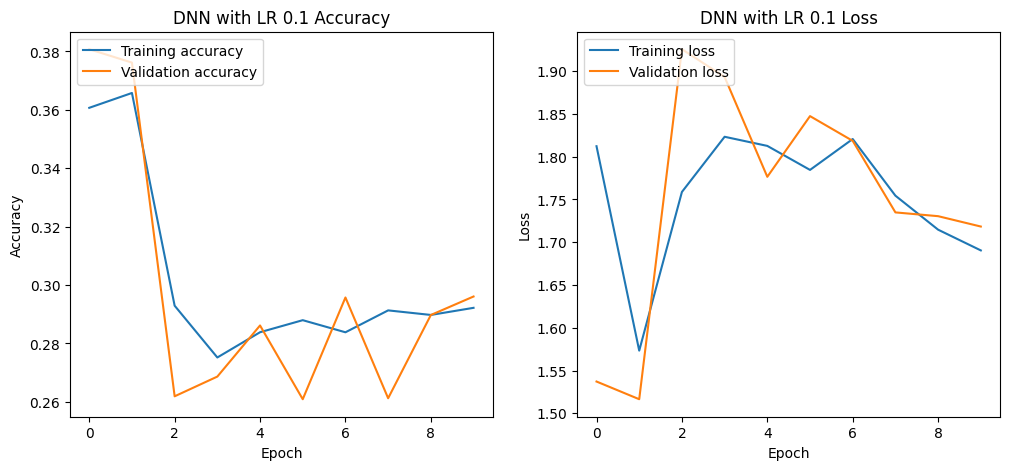

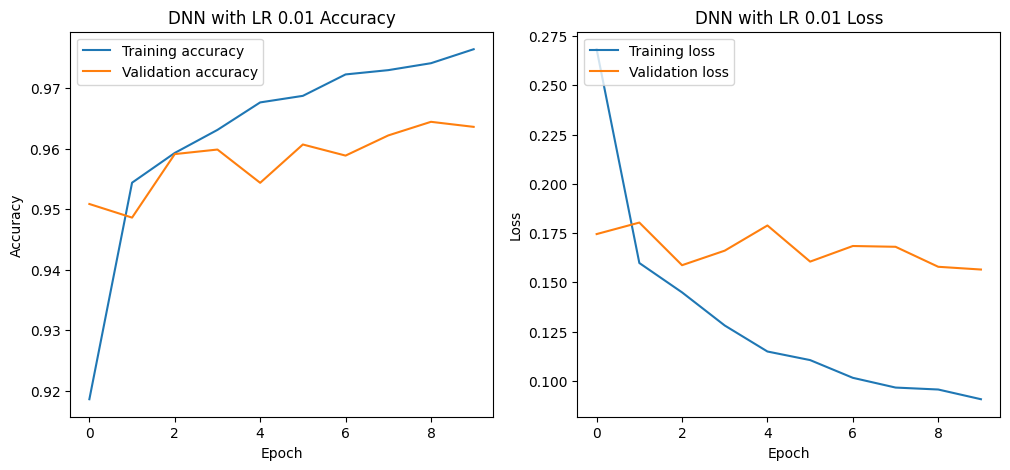

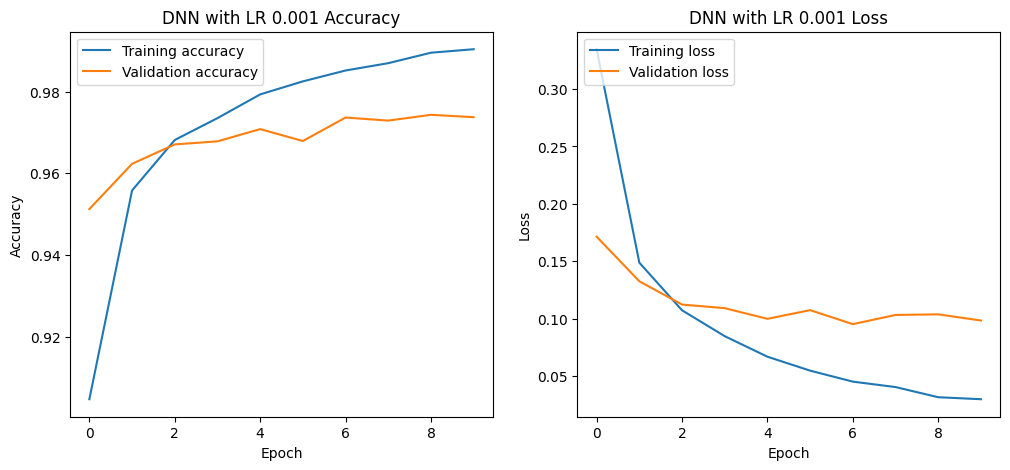

In [ ]:
plot_training_history(history_dnn1, 'DNN with LR 0.1')
plot_training_history(history_dnn2, 'DNN with LR 0.01')
plot_training_history(history_dnn3, 'DNN with LR 0.001')

In [ ]:
from google.colab import files

# Save the model
model3.save('dnn_model_lr_0_001.h5') # Save the model with the desired filename

files.download('dnn_model_lr_0_001.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ConvNet 0.1

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data and reshape for ConvNet
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the ConvNet model
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # First convolutional layer
model4.add(MaxPooling2D(pool_size=(2, 2)))  # First pooling layer
model4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second convolutional layer
model4.add(MaxPooling2D(pool_size=(2, 2)))  # Second pooling layer
model4.add(Flatten())  # Flatten the input
model4.add(Dense(128, activation='relu'))  # Fully connected layer
model4.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model with a learning rate of 0.1
model4.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model4.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ConvNet with learning rate 0.1")

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_convnet1 = model4.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model4.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:10:44
ConvNet with learning rate 0.1
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1063 - loss: 11.3045 - val_accuracy: 0.1081 - val_loss: 2.3059
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1018 - loss: 2.3098 - val_accuracy: 0.1035 - val_loss: 2.3050
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1025 - loss: 2.3090 - val_accuracy: 0.1081 - val_loss: 2.3048
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1071 - loss: 2.3092 - val_accuracy: 0.0989 - val_loss: 2.3070
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1028 - loss: 2.3102 - val_accuracy: 0.0975 - val_loss: 2.3081
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
The accuracy score is: 0.0958


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model4.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_conv1 = f1_score(y_test, y_pred, average='weighted')
auc_conv1 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_conv1)
print("AUC Score:", auc_conv1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.0167505749224311
AUC Score: 0.5


# ConvNet 0.01

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data and reshape for ConvNet
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the ConvNet model
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # First convolutional layer
model5.add(MaxPooling2D(pool_size=(2, 2)))  # First pooling layer
model5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second convolutional layer
model5.add(MaxPooling2D(pool_size=(2, 2)))  # Second pooling layer
model5.add(Flatten())  # Flatten the input
model5.add(Dense(128, activation='relu'))  # Fully connected layer
model5.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model with a learning rate
model5.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model5.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ConvNet with learning rate 0.01")

# Train the model
history_convnet2 = model5.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model5.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:11:06
ConvNet with learning rate 0.01
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8991 - loss: 0.3298 - val_accuracy: 0.9748 - val_loss: 0.0863
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9793 - loss: 0.0639 - val_accuracy: 0.9824 - val_loss: 0.0605
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9840 - val_loss: 0.0616
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0428 - val_accuracy: 0.9751 - val_loss: 0.1112
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0485 - val_accuracy: 0.9778 - val_loss: 0.1223
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9818 - val_loss: 0.0746
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9906 - loss: 0.0345 - val_accuracy: 0.9830 - val_loss: 0.0806
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model5.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_conv2 = f1_score(y_test, y_pred, average='weighted')
auc_conv2 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_conv2)
print("AUC Score:", auc_conv2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.9753850134089922
AUC Score: 0.9995283129696301


# ConvNet 0.001

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data and reshape for ConvNet
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to add channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

from keras.layers import Dropout

# Initialize the ConvNet model
model6 = Sequential() # Moved this line up
model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))  # First convolutional layer
model6.add(MaxPooling2D(pool_size=(2, 2)))  # First pooling layer
model6.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second convolutional layer
model6.add(MaxPooling2D(pool_size=(2, 2)))  # Second pooling layer
model6.add(Flatten())  # Flatten the input
model6.add(Dense(128, activation='relu'))  # Fully connected layer

# Dropout and Dense layers added after model initialization
model6.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.5))  # Another dropout layer
model6.add(Dense(10, activation='softmax'))

# Compile the model with a learning rate of 0.001
model6.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model6.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ConvNet with learning rate 0.001")

# Train the model
history_convnet3 = model6.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model6.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:11:48
ConvNet with learning rate 0.001
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6838 - loss: 0.9394 - val_accuracy: 0.9747 - val_loss: 0.0862
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9523 - loss: 0.1735 - val_accuracy: 0.9847 - val_loss: 0.0552
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.1181 - val_accuracy: 0.9870 - val_loss: 0.0506
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9726 - loss: 0.1043 - val_accuracy: 0.9890 - val_loss: 0.0438
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0764 - val_accuracy: 0.9886 - val_loss: 0.0490
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0689 - val_accuracy: 0.9891 - val_loss: 0.0460
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9842 - loss: 0.0628 - val_accuracy: 0.9893 - val_loss: 0.0452
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model6.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_conv3 = f1_score(y_test, y_pred, average='weighted')
auc_conv3 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_conv3)
print("AUC Score:", auc_conv3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 Score: 0.9885943500540622
AUC Score: 0.9998704248949057


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')

    plt.show()

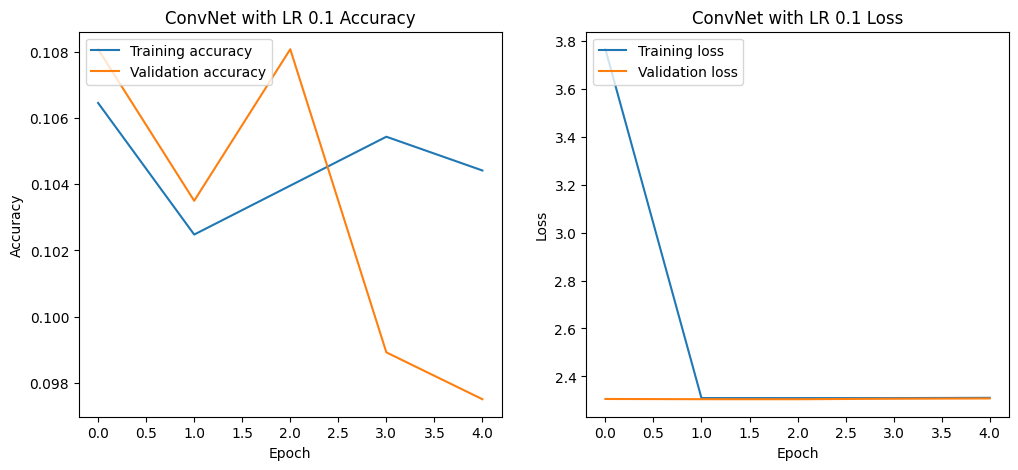

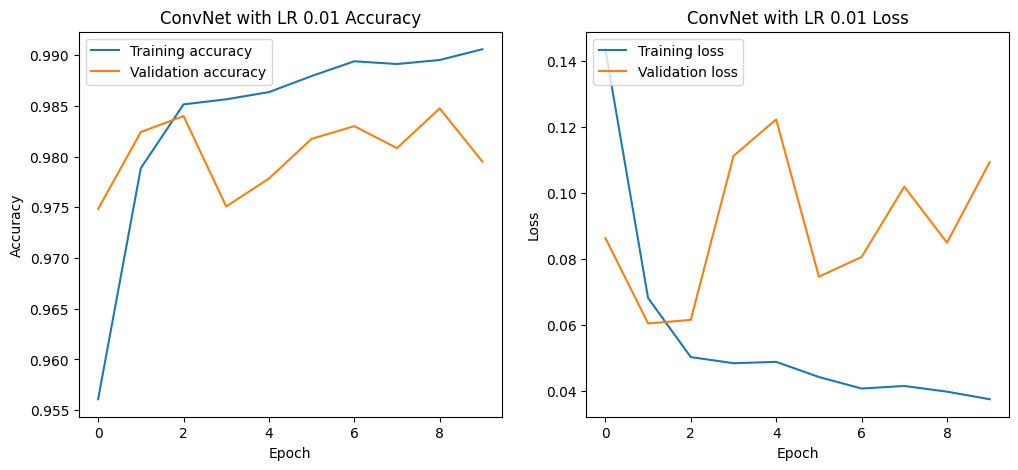

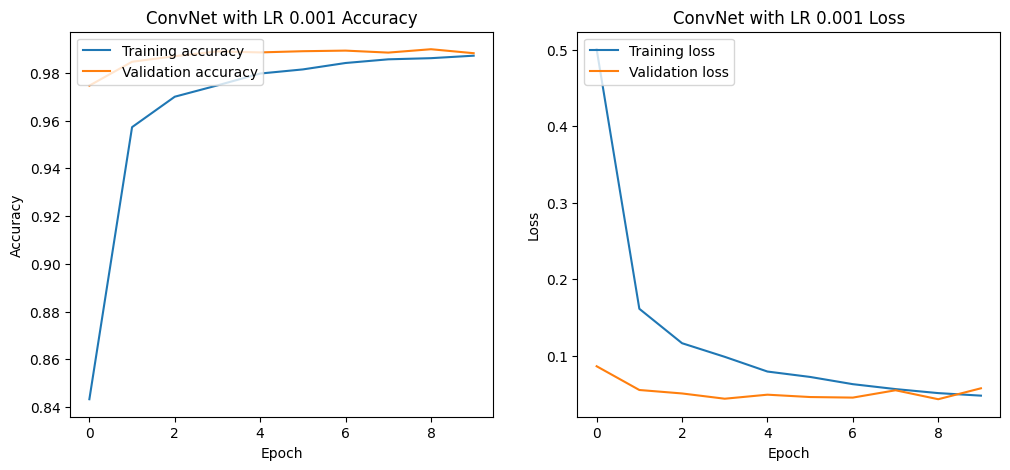

In [ ]:
plot_training_history(history_convnet1, 'ConvNet with LR 0.1')
plot_training_history(history_convnet2, 'ConvNet with LR 0.01')
plot_training_history(history_convnet3, 'ConvNet with LR 0.001')

In [ ]:
from google.colab import files

# Save the model
model6.save('convnet_model_lr_0_001.h5') # Save the model with the desired filename

files.download('convnet_model_lr_0_001.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


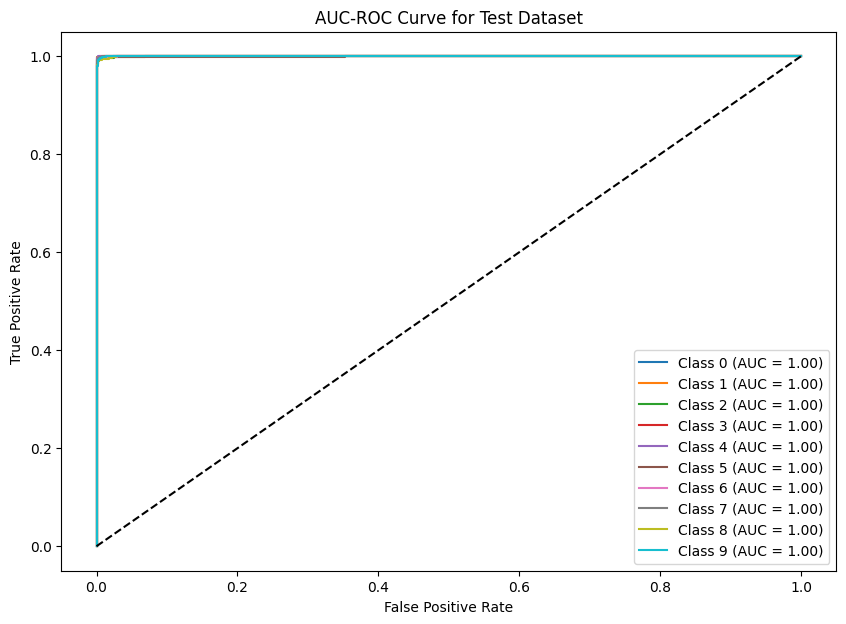

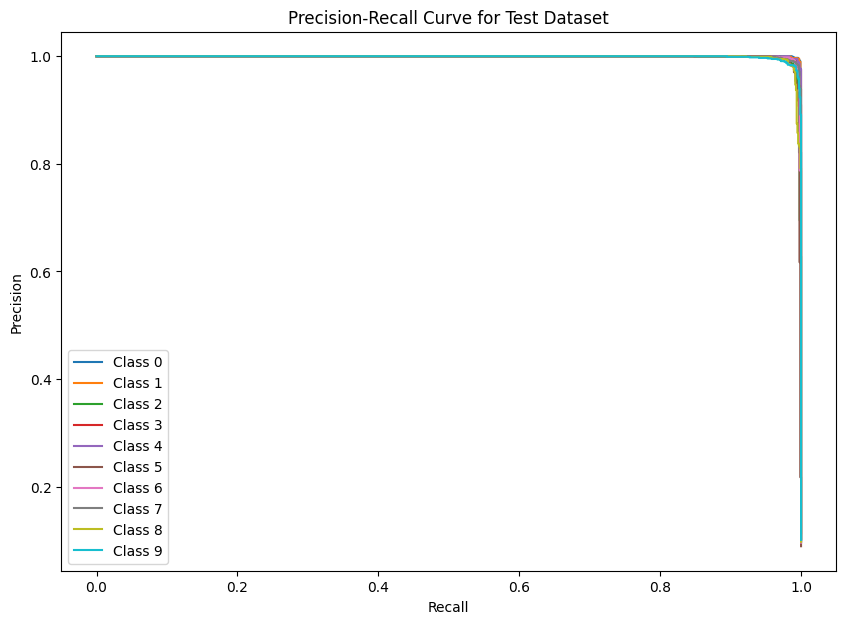

In [ ]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities for the test dataset
y_pred_proba = model.predict(X_test)

# Since this is a multi-class classification (10 classes), we compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]  # Assuming y_test is one-hot encoded

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Test Dataset')
plt.legend(loc='best')
plt.show()


# Compute precision-recall for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Test Dataset')
plt.legend(loc='best')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


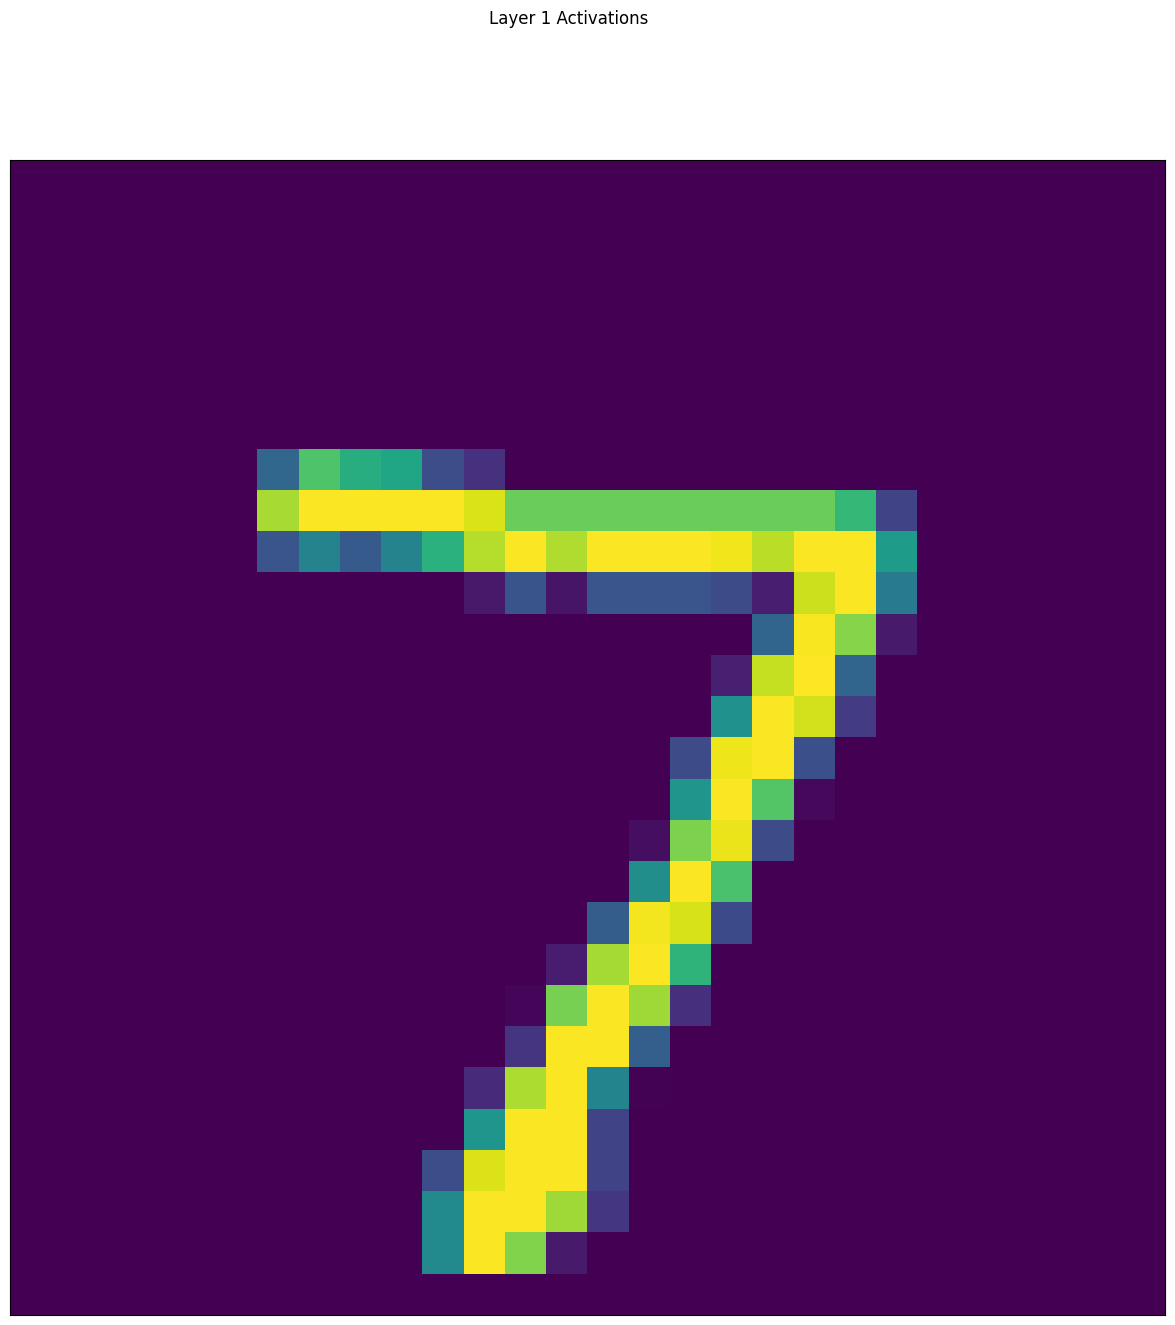

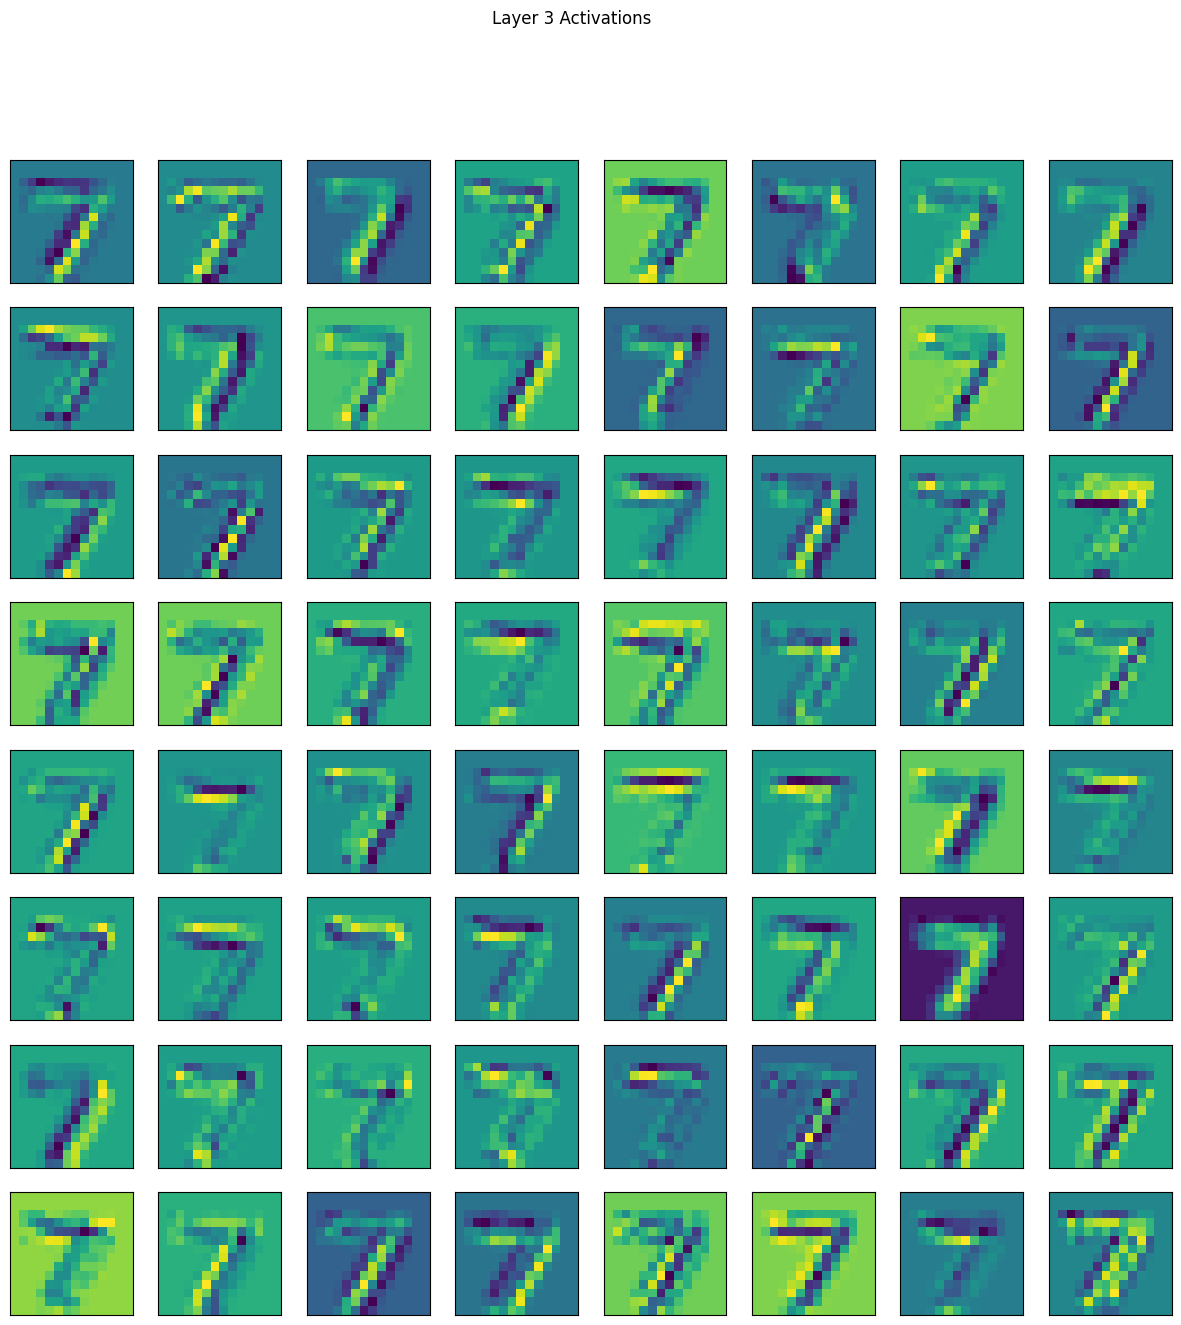

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

def visualize_layer_outputs(model, layer_indices, input_data):
    layer_outputs = [model.layers[i].output for i in layer_indices]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(input_data)

    for layer_idx, activation in zip(layer_indices, activations):
        num_filters = activation.shape[-1]
        activation = activation[0]  # first image in the batch

        plt.figure(figsize=(15, 15))
        # Calculate rows and columns for subplots dynamically
        rows = max(1, num_filters // 8) # Ensure at least one row
        cols = min(8, num_filters) # Limit columns to 8

        for i in range(num_filters):
            ax = plt.subplot(rows, cols, i + 1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(activation[:, :, i], cmap='viridis')
        plt.suptitle(f'Layer {layer_idx + 1} Activations')
        plt.show()

# For ConvNet, visualize the first two Conv2D layers
sample_data = x_test_norm[:1]  # First test sample
visualize_layer_outputs(model, [0, 2], sample_data)  # 0 -> first Conv2D, 2 -> second Conv2D


# VGG 0.1

In [ ]:
from keras.layers import Dropout
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the VGG model
model7 = Sequential()
model7.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model7.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model with a learning rate of 0.1
model7.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model7.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("VGG with learning rate 0.1")

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_vgg1 = model7.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model7.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,440,586 (5.50 MB)

 Trainable params: 1,440,586 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:13:07
VGG with learning rate 0.1
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.1029 - loss: 2604789.5000 - val_accuracy: 0.0997 - val_loss: 2.3098
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.1057 - loss: 2.3080 - val_accuracy: 0.0989 - val_loss: 2.3080
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1047 - loss: 2.3098 - val_accuracy: 0.1060 - val_loss: 2.3120
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1066 - loss: 2.3099 - val_accuracy: 0.1060 - val_loss: 2.3095
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1083 - loss: 2.3084 - val_accuracy: 0.0956 - val_loss: 2.3126
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The accuracy score is: 0.1009


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model7.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_vgg1 = f1_score(y_test, y_pred, average='weighted')
auc_vgg1 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_vgg1)
print("AUC Score:", auc_vgg1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.018495431010991006
AUC Score: 0.5


# VGG 0.01

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the VGG model
model8 = Sequential()
model8.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model8.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model with a learning rate of 0.01
model8.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model8.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("VGG with learning rate 0.01")

# Train the model
history_vgg2 = model8.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model8.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,440,586 (5.50 MB)

 Trainable params: 1,440,586 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:14:32
VGG with learning rate 0.01
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.1046 - loss: 3.2596 - val_accuracy: 0.1060 - val_loss: 2.3042
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1136 - loss: 2.3022 - val_accuracy: 0.1060 - val_loss: 2.3041
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1125 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3034
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1089 - loss: 2.3028 - val_accuracy: 0.1060 - val_loss: 2.3035
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1147 - loss: 2.3014 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1153 - loss: 2.3016 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1098 - loss: 2.3025 - val_accuracy: 0.1060 - val_loss: 2.3032
Epoch 8/10
750/750 ━━━━━━━━━

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model8.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_vgg2 = f1_score(y_test, y_pred, average='weighted')
auc_vgg2 = roc_auc_score(y_test, y_prod, multi_class='ovr')

# Print the scores
print("F1 Score:", f1_vgg2)
print("AUC Score:", auc_vgg2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1 Score: 0.023138302649304
AUC Score: 0.5


# VGG 0.001

In [ ]:
import numpy as np
import pytz
from datetime import datetime
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the VGG model
model9 = Sequential()
model9.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model9.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model9.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model9.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Flatten())
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model with a learning rate of 0.001
model9.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model9.summary()

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("VGG with learning rate 0.001")

# Train the model
history_vgg3 = model9.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on the test set
y_prod = model9.predict(X_test)
y_pred = y_prod.argmax(axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = y_test.argmax(axis=1)

# Calculate and print the accuracy score
print("The accuracy score is:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,440,586 (5.50 MB)

 Trainable params: 1,440,586 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

Current Time: 2024-10-05 22:16:32
VGG with learning rate 0.001
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8333 - loss: 0.5152 - val_accuracy: 0.9868 - val_loss: 0.0463
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9800 - loss: 0.0696 - val_accuracy: 0.9899 - val_loss: 0.0319
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9879 - loss: 0.0421 - val_accuracy: 0.9908 - val_loss: 0.0350
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9886 - loss: 0.0429 - val_accuracy: 0.9820 - val_loss: 0.0680
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9924 - val_loss: 0.0326
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9932 - loss: 0.0236 - val_accuracy: 0.9899 - val_loss: 0.0402
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9933 - loss: 0.0237 - val_accuracy: 0.9915 - val_loss: 0.0340
Epoch 8/10
750/750 ━━━━━━━━

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Predict on the test set
y_prod= model8.predict(X_test)
y_pred= np.argmax(y_prod, axis=1)  # Get predicted labels

# Convert one-hot encoded test labels back to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)  # Get the true class labels

# Calculate F1 and AUC scores for DNN
f1_vgg3 = f1_score(y_test, y_pred, average='weighted')
auc_vgg3 = roc_auc_score(y_test, y_prod, multi_class='ovo')

# Print the scores
print("F1 Score:", f1_vgg3)
print("AUC Score:", auc_vgg3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.023138302649304
AUC Score: 0.5


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')

    plt.show()

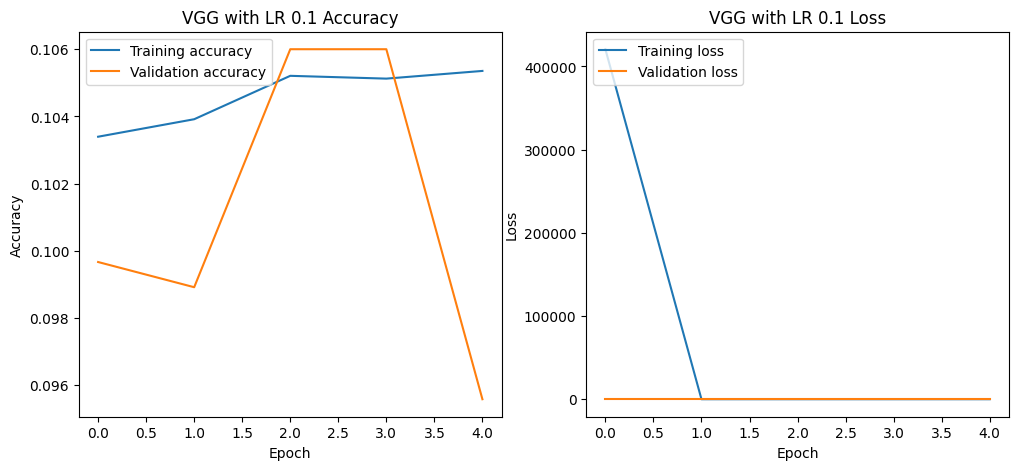

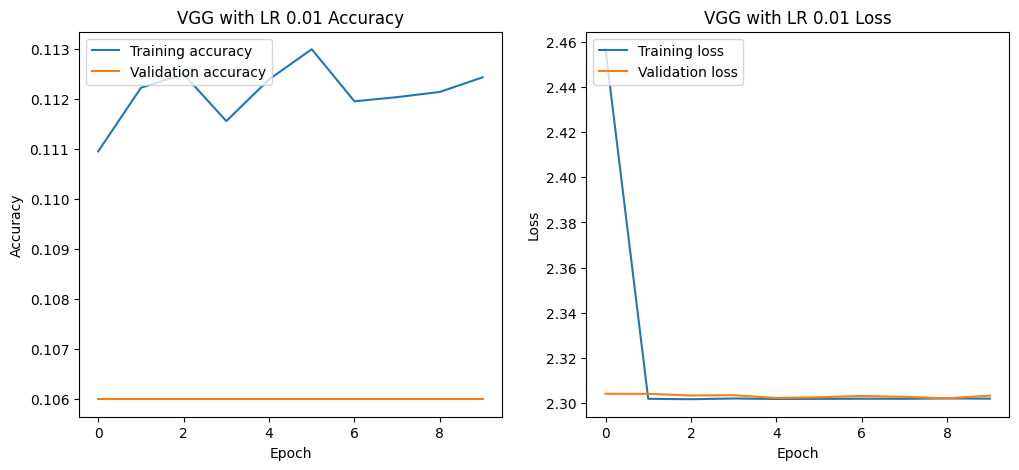

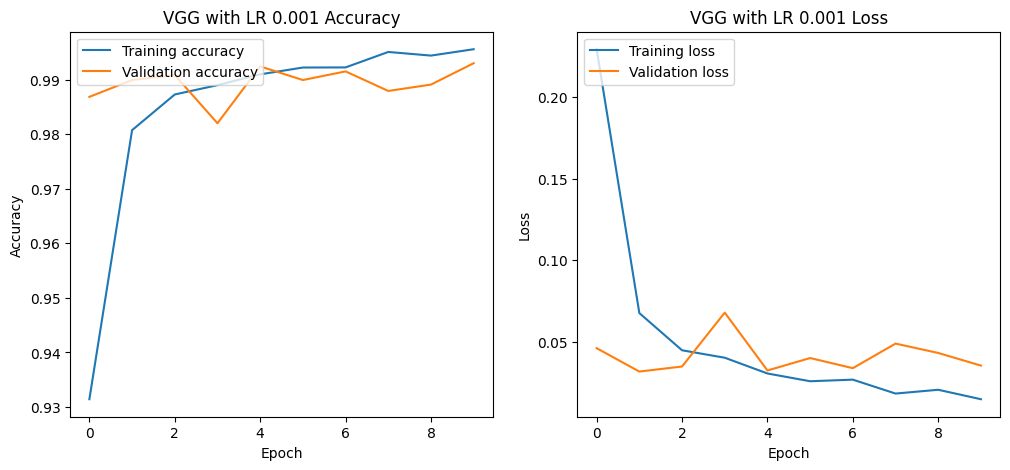

In [ ]:
plot_training_history(history_vgg1, 'VGG with LR 0.1')
plot_training_history(history_vgg2, 'VGG with LR 0.01')
plot_training_history(history_vgg3, 'VGG with LR 0.001')

In [ ]:
from google.colab import files

# Save the model
model9.save('vgg_model_lr_0_001.h5') # Save the model with the desired filename

files.download('vgg_model_lr_0_001.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# ResNet-18 model definition
def residual_block(x, filters, increase_filters=False):
    shortcut = x
    if increase_filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=2, padding='same')(x)

    x = layers.Conv2D(filters, kernel_size=3, padding='same', strides=(2 if increase_filters else 1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([x, shortcut])  # Skip connection
    x = layers.ReLU()(x)
    return x

def build_resnet_18(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=7, padding='same', strides=2)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)  # First block with 64 filters
    x = residual_block(x, 64)

    x = residual_block(x, 128, increase_filters=True)  # Transition to 128 filters
    x = residual_block(x, 128)

    x = residual_block(x, 256, increase_filters=True)  # Transition to 256 filters
    x = residual_block(x, 256)

    x = residual_block(x, 512, increase_filters=True)  # Transition to 512 filters
    x = residual_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
input_shape = (28, 28, 1)  # Input shape for MNIST
num_classes = 10            # Number of classes
model = build_resnet_18(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9151 - loss: 0.2967 - val_accuracy: 0.7883 - val_loss: 0.7637
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9817 - loss: 0.0602 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9799 - val_loss: 0.0702
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9776 - val_loss: 0.0837
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9870 - val_loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9815 - loss: 0.0582
Test accuracy: 0.9869999885559082


In [ ]:
from datetime import datetime
model10 = build_resnet_18(input_shape, num_classes)
model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rn1 = model10.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

y_pred_prob1 = model10.predict(x_test)
y_pred = np.argmax(y_pred_prob1, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ResNet with learning rate 0.1")

# Evaluate the model
test_loss, test_acc = model10.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

f1 = f1_score(y_true, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_prob1, multi_class='ovr')  # For multi-class classification

print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.3061 - loss: 17.4810 - val_accuracy: 0.5704 - val_loss: 4.3379
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6469 - loss: 1.4392 - val_accuracy: 0.4824 - val_loss: 2.8395
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8076 - loss: 0.9303 - val_accuracy: 0.3663 - val_loss: 2.7586
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6891 - loss: 0.8576 - val_accuracy: 0.3236 - val_loss: 5.5858
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6936 - loss: 42.9918 - val_accuracy: 0.1150 - val_loss: 19.6916
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Current Time: 2024-10-05 22:22:49
ResNet with learning rate 0.1
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1164 - loss: 19.4171
Test accuracy: 0.11500000208616257
F1 Score: 0.023477679930439477
AUC Score: 0.5014611912165933


In [ ]:
from datetime import datetime
model11 = build_resnet_18(input_shape, num_classes)
model11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rn2 = model11.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

y_pred_prob2 = model11.predict(x_test)
y_pred = np.argmax(y_pred_prob2, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ResNet with learning rate 0.01")

# Evaluate the model
test_loss, test_acc = model11.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

f1 = f1_score(y_true, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_prob2, multi_class='ovr')  # For multi-class classification

print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.8478 - loss: 0.6979 - val_accuracy: 0.9327 - val_loss: 0.2326
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9758 - loss: 0.0774 - val_accuracy: 0.9693 - val_loss: 0.1050
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9813 - loss: 0.0651 - val_accuracy: 0.9784 - val_loss: 0.0781
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9730 - val_loss: 0.0897
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9888 - loss: 0.0393 - val_accuracy: 0.9681 - val_loss: 0.1186
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Current Time: 2024-10-05 22:24:39
ResNet with learning rate 0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.1341
Test accuracy: 0.9681000113487244
F1 Score: 0.9672469738891369
AUC Score: 0.9993196715588641


In [ ]:
from datetime import datetime
model12 = build_resnet_18(input_shape, num_classes)
model12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_rn3 = model12.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

y_pred_prob2 = model12.predict(x_test)
y_pred = np.argmax(y_pred_prob2, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get current UTC time
utc_now = datetime.now(pytz.utc)

# Convert to your desired time zone (e.g., US Eastern Time)
local_timezone = pytz.timezone('America/New_York')
local_time = utc_now.astimezone(local_timezone)

# Print the local time
print("Current Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))
print("ResNet with learning rate 0.001")

# Evaluate the model
test_loss, test_acc = model12.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

f1 = f1_score(y_true, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_prob2, multi_class='ovr')  # For multi-class classification

print(f'F1 Score: {f1}')
print(f'AUC Score: {auc}')

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9195 - loss: 0.2964 - val_accuracy: 0.8842 - val_loss: 0.3358
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9838 - loss: 0.0547 - val_accuracy: 0.9498 - val_loss: 0.1654
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9845 - val_loss: 0.0538
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9795 - val_loss: 0.0674
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9848 - val_loss: 0.0507
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Current Time: 2024-10-05 22:26:00
ResNet with learning rate 0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0691
Test accuracy: 0.9847999811172485
F1 Score: 0.9847494182969353
AUC Score: 0.9998780533997739


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')

    plt.show()

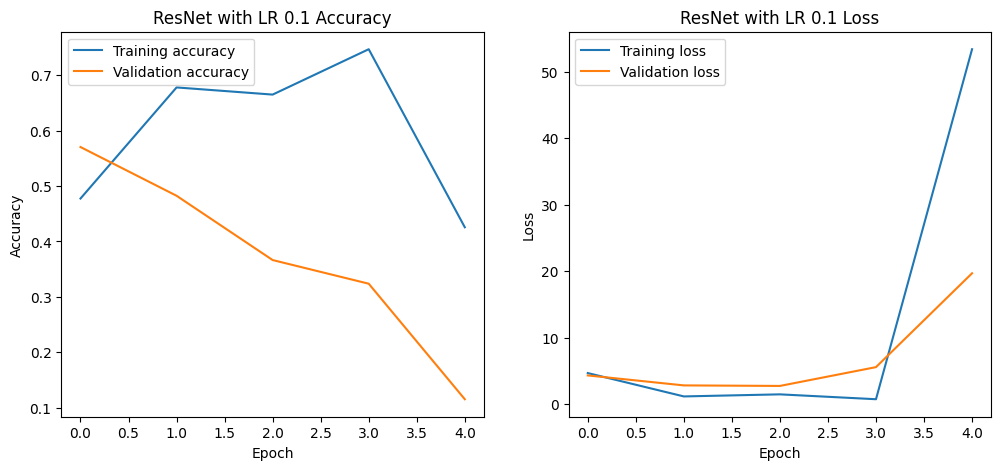

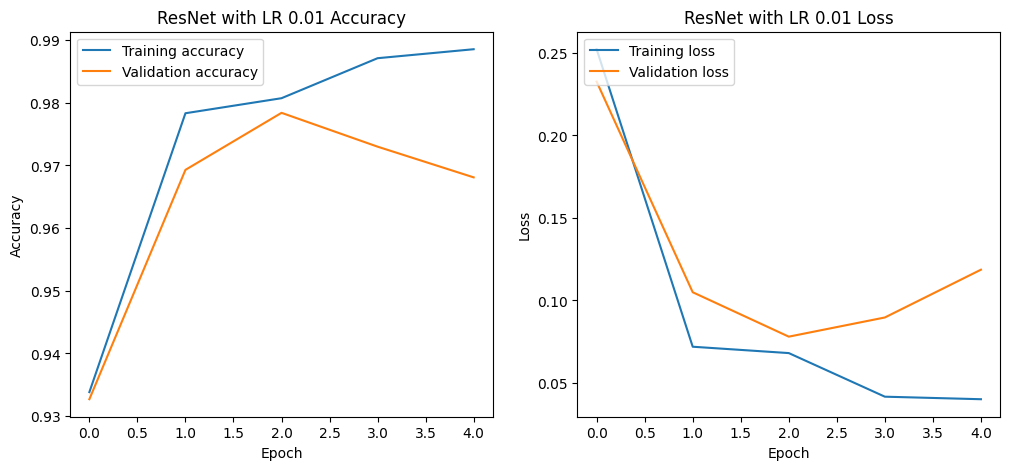

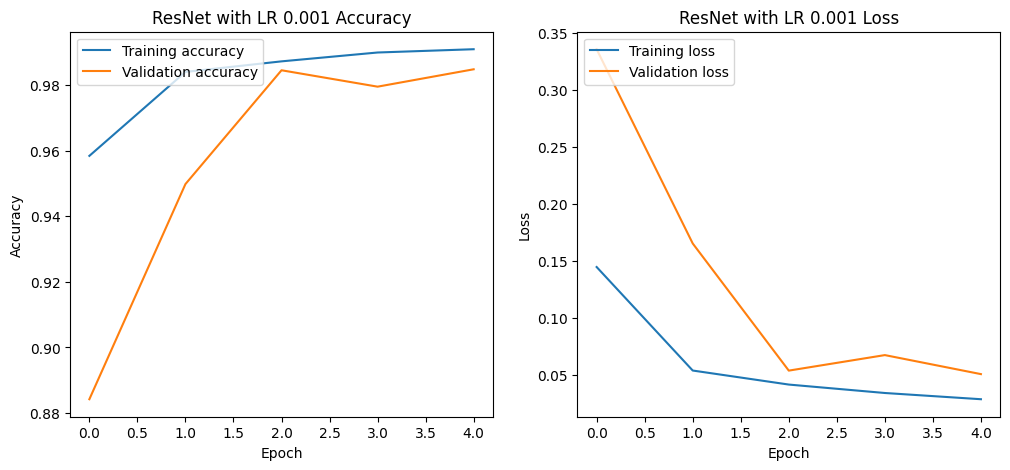

In [ ]:
plot_training_history(history_rn1, 'ResNet with LR 0.1')
plot_training_history(history_rn2, 'ResNet with LR 0.01')
plot_training_history(history_rn3, 'ResNet with LR 0.001')

In [ ]:
from google.colab import files

# Save the model
model12.save('resnet_model_lr_0_001.h5') # Save the model with the desired filename

files.download('resnet_model_lr_0_001.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>